<a href="https://colab.research.google.com/github/tacocat0200/Relevant-projects/blob/main/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class SVM:
    def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
    #will come up with these later    
        self.w = None
        self.b  = None

    #fit training samples and labels into this function
    def fit(self, X, y):
      n_samples, n_features = X.shape #input X is numpy array: rows = no.of samples
      #columns = no. of features
      y_ = np.where(y <= 0, -1, 1)
      
      self.w = np.zeros(n_features)
      self.b = 0
      
      #Start with gradient descent
      for _ in range(self.n_iters):
        #iterate over training sample
        for idx, x_i in enumerate(X):
          #gives us both the current index and current sample
          condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
          if condition:
            self.w-= self.lr * (2*self.lambda_param*self.w)
          else:
            self.w -= self.lr * (2*self.lambda_param*self.w - np.dot(y_[idx], x_i))
            self.b -= self.lr * y_[idx]



    def predict(self, X):
      #coding w*x - b = hyperplane
      approx = np.dot(X, self.w) - (self.b)
      return np.sign(approx)



# Testing

[0.58977016 0.17946483] -0.1520000000000001


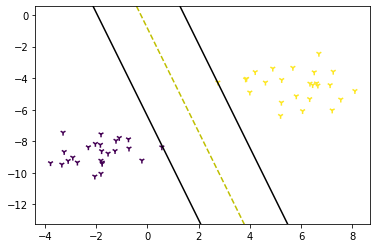

In [ ]:
if __name__ == "__main__":

  from sklearn import datasets
  import matplotlib.pyplot as plt

  X, y = datasets.make_blobs(n_samples=50, n_features=2 , centers=2,
    cluster_std=1.05, random_state=40)
  y = np.where(y == 0, -1, 1) #in our case the 2 categories are -1,1 but in most labels it is 0,1 so we convert the y=0 to y=-1 
  #for our internal calculations

  clf = SVM()
  clf.fit(X, y)

  print(clf.w, clf.b) #we called the fit function to initialise w, b and use GD to optimise them

  def visualize_svm():
      def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]  #when to take w[0] and when w[1]

      fig = plt.figure()
      ax = fig.add_subplot(1, 1, 1) #add axes to add in the hyperplanes, the points will be plotted even without this (specified in the line below)
      plt.scatter(X[:, 0], X[:, 1], marker = "1", c = y) #plots the points themselves - how are 23 features plottes in 2D

      x0_min = np.amin(X[:, 0]) #returns the min value in the first feature column to specify lowermost boundary value for class = 1
      x0_max = np.amax(X[:, 0]) #returns the max value in the first feature column to specify uppermost boundary value for class = -1

      x1_1 = get_hyperplane_value(x0_min, clf.w, clf.b, 0) #don't understand these 6 calculations
      x1_2 = get_hyperplane_value(x0_max, clf.w, clf.b, 0)

      x1_1_m = get_hyperplane_value(x0_min, clf.w, clf.b, -1)
      x1_2_m = get_hyperplane_value(x0_max, clf.w, clf.b, -1)

      x1_1_p = get_hyperplane_value(x0_min, clf.w, clf.b, 1)
      x1_2_p = get_hyperplane_value(x0_max, clf.w, clf.b, 1)

      ax.plot([x0_min, x0_max], [x1_1, x1_2], "y--") # y-- draws a broken line in yellow
      ax.plot([x0_min, x0_max], [x1_1_m, x1_2_m], "k") # k draw unbroken line in purpe(?)
      ax.plot([x0_min, x0_max], [x1_1_p, x1_2_p], "k") 

      x1_min = np.amin(X[:, 1])
      x1_max = np.amax(X[:, 1])
      ax.set_ylim([x1_min - 3, x1_max + 3]) #sets limit on how much y-axis covers - no need to do so for X-axis cuz all points must be plotted
      #X-axis is the first feature "0th" column, Y-axis is the 2nd feature "1st" column - would it have been different for >2 features and how? - is this why
      #my 23 feature plotting is weird AF- the purple lines not on the boundary points but instead somewhere weird?

      plt.show()
  visualize_svm() #function-call statement


  #so no matter how many features you have, the matrix 